In [10]:
import numpy as np
import pandas as pd

Tar=pd.read_excel("Copy of BCI - C5TC.xlsx")

Tar["Date"]=pd.to_datetime(Tar["Date"],dayfirst=True)
# Target["Date"]=Target["Date"].dt.date
# Target["Date"]=pd.to_datetime(Target["Date"])

Tar = (Tar.set_index('Date')
      .reindex(pd.date_range('2015-01-01', '2023-12-13', freq='D'))
      .rename_axis(['Date'])
      .reset_index())

Target=Tar.copy()

Target.set_index("Date",inplace=True)



Target.fillna(method="ffill",inplace=True)

Target=Target.dropna()

In [11]:
train=Target.iloc[:-365,:]
test=Target.iloc[-365:,:]

NameError: name 'covalidation' is not defined

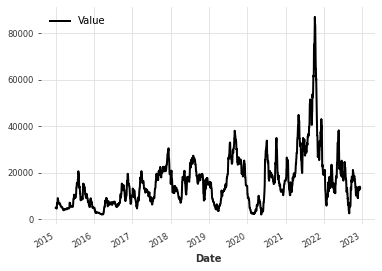

In [12]:
import darts
from darts import TimeSeries

series=TimeSeries.from_dataframe(train)
series.plot()

training, validation = series.split_after(0.9)
training.plot()
validation.plot()

In [13]:
from darts.models import ExponentialSmoothing, AutoARIMA, Theta, NaiveDrift, NaiveSeasonal
from darts.models import TBATS, NBEATSModel, TCNModel, TransformerModel
from darts.models import RNNModel, BlockRNNModel



from darts.metrics import mape


models = [
    ExponentialSmoothing(),
    AutoARIMA(),
    Theta(),
    NaiveDrift(),
    NaiveSeasonal(K=12),
    TBATS(),
    NBEATSModel(input_chunk_length=24, output_chunk_length=12, random_state=42),
    TCNModel(input_chunk_length=24, output_chunk_length=12, random_state=42),
    TransformerModel(input_chunk_length=24, output_chunk_length=12),
    RNNModel(input_chunk_length=24),
    
    BlockRNNModel(input_chunk_length=24, output_chunk_length=12)
]

def eval_model(model):
    model.fit(training)
    forecast = model.predict(len(validation))
    return (str(model), mape(validation, forecast))

results = [eval_model(model) for model in models]
best_model, best_mape = min(results, key=lambda x: x[1])
print(f"The best model is {best_model} with mape:{best_mape:.2f}.")

# Prediction with the best model.

/home/ggjps0806p/.local/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/home/ggjps0806p/.local/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | stacks        | ModuleList       | 6.2 M 
---------------------------------------------------
6.2 M     Trainable params
1.4 K     Non-trainable params
6.2 M     Total params
24.787    Total estimated model params size (MB)


Training: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=100` reached.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name          | Type              | Params
----------------------------------------------------
0 | criterion     | MSELoss           | 0     
1 | train_metrics | MetricCollection  | 0     
2 | val_metrics   | MetricCollection  | 0     
3 | dropout       | MonteCarloDropout | 0     
4 | res_blocks    | ModuleList        | 152   
----------------------------------------------------
152       Trainable params
0         Non-trainable params
152       Total params
0.001     Total estimated model params size (MB)


Training: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=100` reached.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

/home/ggjps0806p/.local/lib/python3.8/site-packages/torch/nn/modules/transformer.py:286: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name                | Type                | Params
------------------------------------------------------------
0 | criterion           | MSELoss             | 0     
1 | train_metrics       | MetricCollection    | 0     
2 | val_metrics         | MetricCollection    | 0     
3 | encoder             | Linear              | 128   
4 | positional_encoding | _PositionalEncoding | 0     
5 | transformer         | Transformer         | 548 K 
6 | deco

Training: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=100` reached.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | rnn           | RNN              | 700   
4 | V             | Linear           | 26    
---------------------------------------------------
726       Trainable params
0         Non-trainable params
726       Total params
0.003     Total estimated model params size (MB)


Training: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=100` reached.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | rnn           | RNN              | 700   
4 | fc            | Sequential       | 312   
---------------------------------------------------
1.0 K     Trainable params
0         Non-trainable params
1.0 K     Total params
0.004     Total estimated model params size (MB)


Training: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=100` reached.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

The best model is TBATS() with mape:39.66.


In [29]:
test_series = TimeSeries.from_dataframe(test)
best_model = BlockRNNModel(input_chunk_length=24, output_chunk_length=12,n_epochs=10)
best_model.fit(series)
forecast = best_model.predict(len(test_series))
rmse_score = rmse(test_series, forecast)
print(f"The best model obtains RMSE:{rmse_score:.2f} on the test data.")

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | rnn           | RNN              | 700   
4 | fc            | Sequential       | 312   
---------------------------------------------------
1.0 K     Trainable params
0         Non-trainable params
1.0 K     Total params
0.004     Total estimated model params size (MB)


Training: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=10` reached.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

The best model obtains RMSE:18101.36 on the test data.


<AxesSubplot:xlabel='Date'>

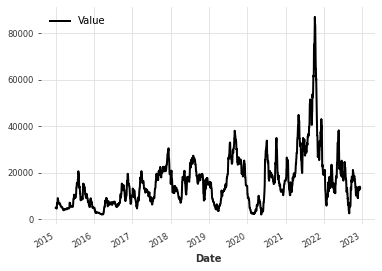

In [30]:
series.plot()


<AxesSubplot:xlabel='Date'>

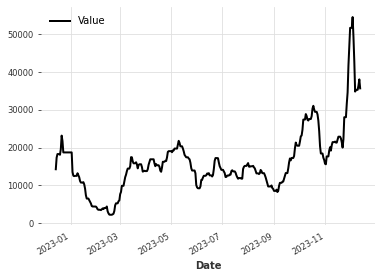

In [31]:
test_series.plot()


<AxesSubplot:xlabel='Date'>

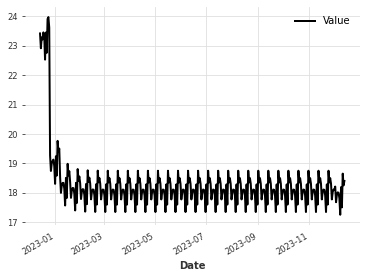

In [32]:
forecast.plot()